### OBJECTIVE: House price prediction with RMSE, R-Square performance metrics
The house price prediction modeling aims to develop an accurate and reliable system to estimate prices of residential properties by analysing various factors such as location, area, renovation and built year, and quality score.

Multiple ML models (Linear Regression, Decision tree, Random Forest, Ensemble models - Boosting, XG Boost etc)  will be created and there performance will be evaluated using performance metrics - RMSE, R-Square performance metrics

This will provide valuable insights on using multiple models for predicting a continuous variable depending on numerous features.

<center>
    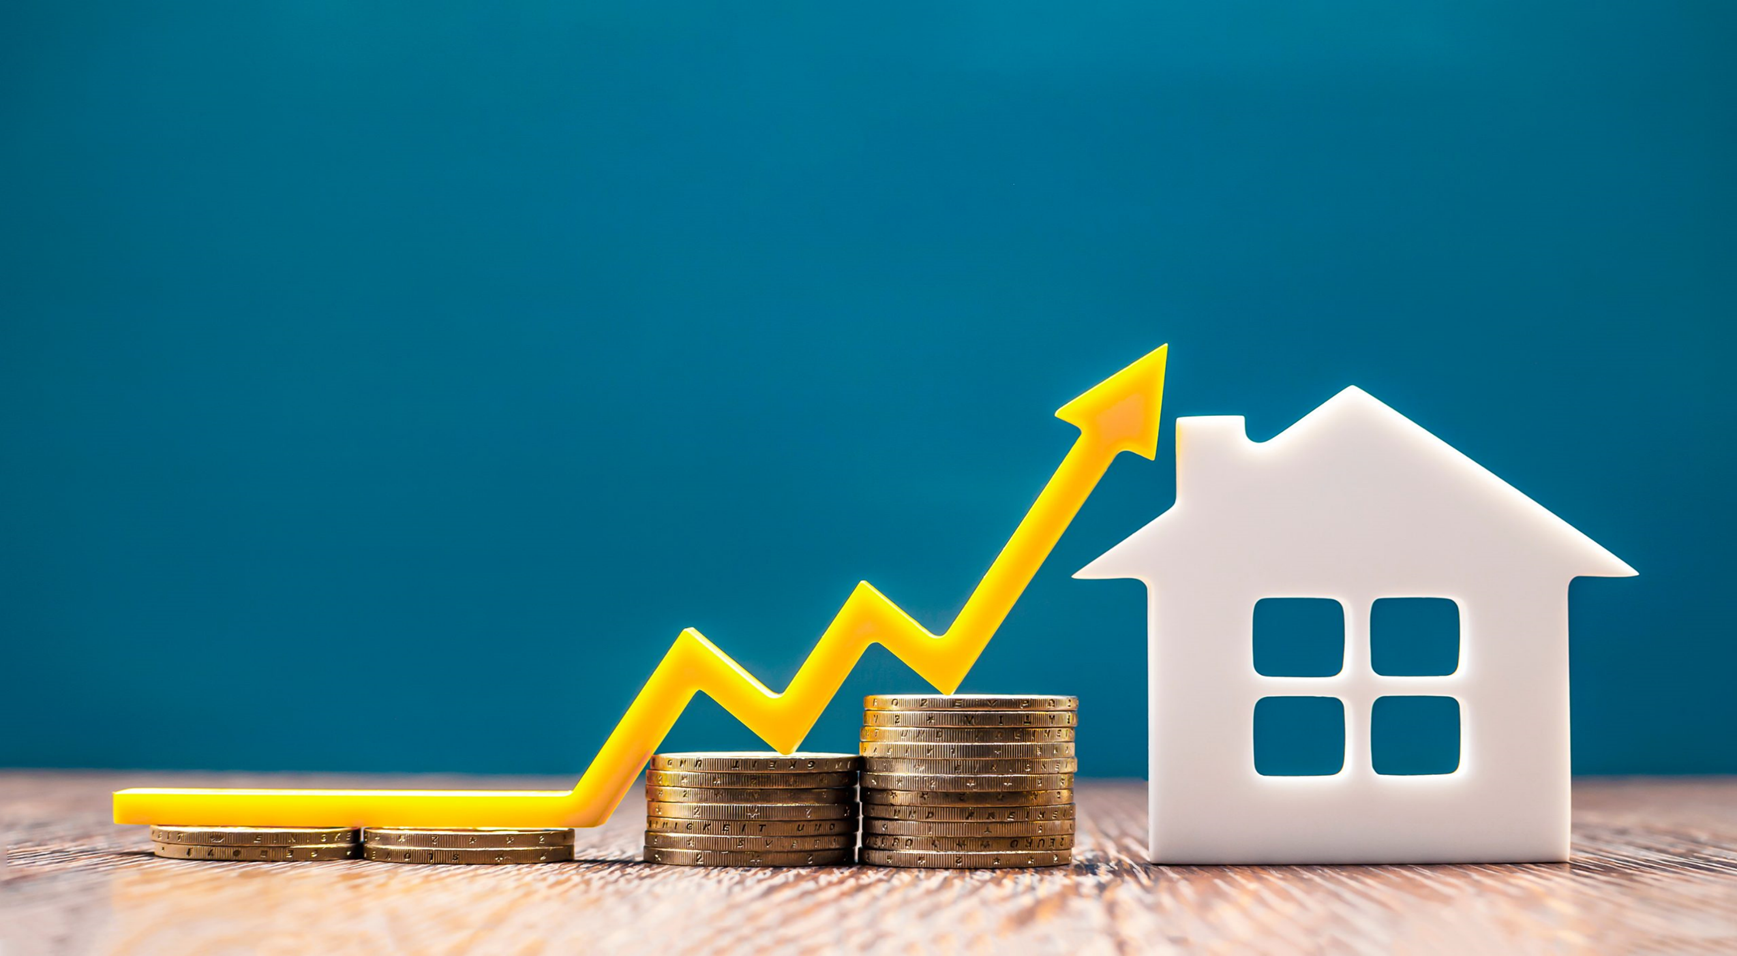
</center>

## GITHUB Repository URL:  
https://github.com/rakesh82rawat?tab=repositories  
  
## KAGGLE Code URL:  
https://www.kaggle.com/rakesh82rawat/code


In [1]:
# importing key libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt

import sklearn
import statsmodels

import warnings
warnings.filterwarnings("ignore")

# PREPROCESSING Imports
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#LINEAR REGRESSION specific Imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv('/kaggle/input/innercity/innercity.csv')

In [5]:
# FOR LOCAL SYSTEM
#df = pd.read_excel('innercity.xlsx')

In [6]:
# Display max columns
pd.set_option('display.max_columns', None)

df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0        13457   1.0      0      0          5        9          3020   
1         7500   1.0      0      0          3        8          1750   
2         4324   2.0      0      0          3        8          2370   
3         3844   1.0      0      0          4        6           820   
4         4050   1.0      0      0          4        8          1400   

   basement  yr_built  yr_renovated  zipcode      lat     long  \
0         0      1956             0    98133  47.7174 -122.336   
1       800      1976             0    98023  47.3165 -122.386   
2         0      2006             0    98038  47.3515 -121.999   
3         0      1916             0    98133  47.7049 -122.349   
4         0      1954             0    98115  47.6768 -122.269   

   living_measure15  lot_measure15  furnished  total_area  
0              2120           7553          1       16477  
1              2260           8800          0       10050  
2              2370           4348          0        6694  
3              1520           3844          0        4664  
4              1900           5940          0        5450

In [7]:
# Checking the number of rows (observations) and the number of columns (variables)
display(df.shape)
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

(21613, 23)

The number of rows (observations) is 21613 
The number of columns (variables) is 23


In [8]:
# Checking data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [9]:
# Getting unique pin-codes to locate the source of data
df['zipcode'].unique()

array([98133, 98023, 98038, 98115, 98059, 98028, 98119, 98003, 98117,
       98092, 98053, 98166, 98011, 98058, 98178, 98144, 98031, 98125,
       98103, 98004, 98056, 98122, 98006, 98074, 98106, 98034, 98001,
       98075, 98107, 98002, 98027, 98126, 98022, 98055, 98188, 98198,
       98136, 98146, 98052, 98014, 98116, 98168, 98010, 98033, 98005,
       98042, 98045, 98008, 98065, 98105, 98118, 98032, 98077, 98199,
       98040, 98155, 98177, 98112, 98007, 98029, 98019, 98030, 98039,
       98148, 98072, 98070, 98108, 98109, 98102, 98024])

### Using Tableau we locate the source of data on Map
Based on the zipcode data provided,We indicate the location on the map using Tableau. It is observed that the data is collected from ~23 cities in Washington state. 

The cities are highlighted in the map for reference. 

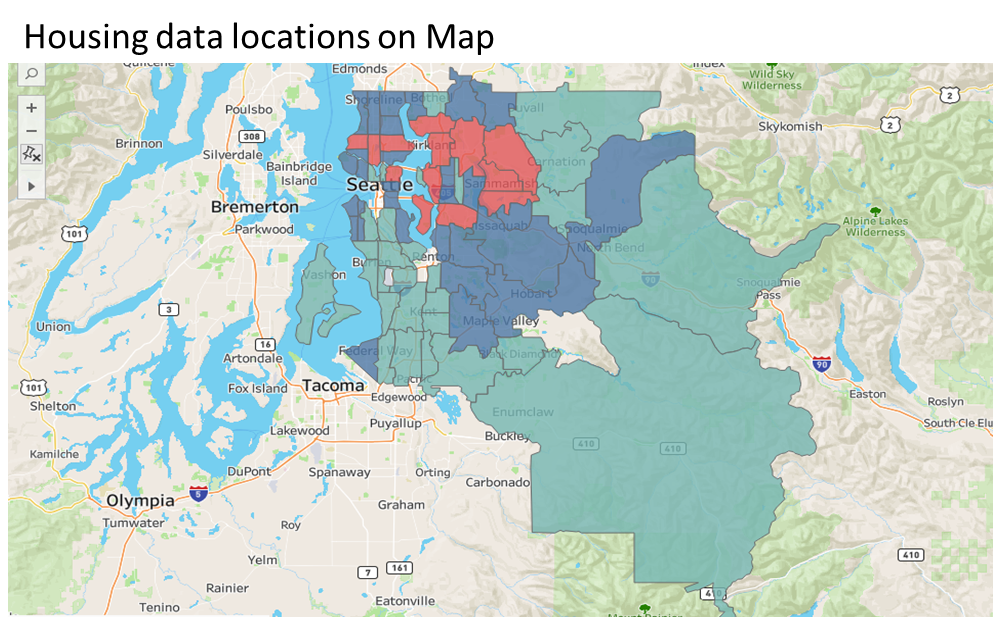


In [10]:
# checking the basic measures of descriptive statistics for the continuous variables
df.describe().T

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
room_bath         21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
living_measure    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
lot_measure       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
ceil              21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
coast             21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
sight             21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition         21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
quality           21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
ceil_measure      21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
living_measure15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
lot_measure15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   
furnished         21613.0  1.966872e-01  3.975030e-01  0.000000e+00   
total_area        21613.0  1.718687e+04  4.158908e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.035000e+03  9.575000e+03  1.300000e+04  1.652659e+06

In [11]:
pd.options.display.float_format = '{:,.1f}'.format  # set global format

df.describe(include='all').T

count unique              top freq            mean  \
cid              21,613.0    NaN              NaN  NaN 4,580,301,520.9   
dayhours            21613    372  20140623T000000  142             NaN   
price            21,613.0    NaN              NaN  NaN       540,182.2   
room_bed         21,613.0    NaN              NaN  NaN             3.4   
room_bath        21,613.0    NaN              NaN  NaN             2.1   
living_measure   21,613.0    NaN              NaN  NaN         2,079.9   
lot_measure      21,613.0    NaN              NaN  NaN        15,107.0   
ceil             21,613.0    NaN              NaN  NaN             1.5   
coast            21,613.0    NaN              NaN  NaN             0.0   
sight            21,613.0    NaN              NaN  NaN             0.2   
condition        21,613.0    NaN              NaN  NaN             3.4   
quality          21,613.0    NaN              NaN  NaN             7.7   
ceil_measure     21,613.0    NaN              NaN  NaN         1,788.4   
basement         21,613.0    NaN              NaN  NaN           291.5   
yr_built         21,613.0    NaN              NaN  NaN         1,971.0   
yr_renovated     21,613.0    NaN              NaN  NaN            84.4   
zipcode          21,613.0    NaN              NaN  NaN        98,077.9   
lat              21,613.0    NaN              NaN  NaN            47.6   
long             21,613.0    NaN              NaN  NaN          -122.2   
living_measure15 21,613.0    NaN              NaN  NaN         1,986.6   
lot_measure15    21,613.0    NaN              NaN  NaN        12,768.5   
furnished        21,613.0    NaN              NaN  NaN             0.2   
total_area       21,613.0    NaN              NaN  NaN        17,186.9   

                             std         min             25%             50%  \
cid              2,876,565,571.3 1,000,102.0 2,123,049,194.0 3,904,930,410.0   
dayhours                     NaN         NaN             NaN             NaN   
price                  367,362.2    75,000.0       321,950.0       450,000.0   
room_bed                     0.9         0.0             3.0             3.0   
room_bath                    0.8         0.0             1.8             2.2   
living_measure             918.4       290.0         1,427.0         1,910.0   
lot_measure             41,420.5       520.0         5,040.0         7,618.0   
ceil                         0.5         1.0             1.0             1.5   
coast                        0.1         0.0             0.0             0.0   
sight                        0.8         0.0             0.0             0.0   
condition                    0.7         1.0             3.0             3.0   
quality                      1.2         1.0             7.0             7.0   
ceil_measure               828.1       290.0         1,190.0         1,560.0   
basement                   442.6         0.0             0.0             0.0   
yr_built                    29.4     1,900.0         1,951.0         1,975.0   
yr_renovated               401.7         0.0             0.0             0.0   
zipcode                     53.5    98,001.0        98,033.0        98,065.0   
lat                          0.1        47.2            47.5            47.6   
long                         0.1      -122.5          -122.3          -122.2   
living_measure15           685.4       399.0         1,490.0         1,840.0   
lot_measure15           27,304.2       651.0         5,100.0         7,620.0   
furnished                    0.4         0.0             0.0             0.0   
total_area              41,589.1     1,423.0         7,035.0         9,575.0   

                             75%             max  
cid              7,308,900,445.0 9,900,000,190.0  
dayhours                     NaN             NaN  
price                  645,000.0     7,700,000.0  
room_bed                     4.0            33.0  
room_bath                    2.5             8.0  
living_measure  

In [12]:
df.describe().T

count            mean             std         min  \
cid              21,613.0 4,580,301,520.9 2,876,565,571.3 1,000,102.0   
price            21,613.0       540,182.2       367,362.2    75,000.0   
room_bed         21,613.0             3.4             0.9         0.0   
room_bath        21,613.0             2.1             0.8         0.0   
living_measure   21,613.0         2,079.9           918.4       290.0   
lot_measure      21,613.0        15,107.0        41,420.5       520.0   
ceil             21,613.0             1.5             0.5         1.0   
coast            21,613.0             0.0             0.1         0.0   
sight            21,613.0             0.2             0.8         0.0   
condition        21,613.0             3.4             0.7         1.0   
quality          21,613.0             7.7             1.2         1.0   
ceil_measure     21,613.0         1,788.4           828.1       290.0   
basement         21,613.0           291.5           442.6         0.0   
yr_built         21,613.0         1,971.0            29.4     1,900.0   
yr_renovated     21,613.0            84.4           401.7         0.0   
zipcode          21,613.0        98,077.9            53.5    98,001.0   
lat              21,613.0            47.6             0.1        47.2   
long             21,613.0          -122.2             0.1      -122.5   
living_measure15 21,613.0         1,986.6           685.4       399.0   
lot_measure15    21,613.0        12,768.5        27,304.2       651.0   
furnished        21,613.0             0.2             0.4         0.0   
total_area       21,613.0        17,186.9        41,589.1     1,423.0   

                             25%             50%             75%  \
cid              2,123,049,194.0 3,904,930,410.0 7,308,900,445.0   
price                  321,950.0       450,000.0       645,000.0   
room_bed                     3.0             3.0             4.0   
room_bath                    1.8             2.2             2.5   
living_measure           1,427.0         1,910.0         2,550.0   
lot_measure              5,040.0         7,618.0        10,688.0   
ceil                         1.0             1.5             2.0   
coast                        0.0             0.0             0.0   
sight                        0.0             0.0             0.0   
condition                    3.0             3.0             4.0   
quality                      7.0             7.0             8.0   
ceil_measure             1,190.0         1,560.0         2,210.0   
basement                     0.0             0.0           560.0   
yr_built                 1,951.0         1,975.0         1,997.0   
yr_renovated                 0.0             0.0             0.0   
zipcode                 98,033.0        98,065.0        98,118.0   
lat                         47.5            47.6            47.7   
long                      -122.3          -122.2          -122.1   
living_measure15         1,490.0         1,840.0         2,360.0   
lot_measure15            5,100.0         7,620.0        10,083.0   
furnished                    0.0             0.0             0.0   
total_area               7,035.0         9,575.0        13,000.0   

                             max  
cid              9,900,000,190.0  
price                7,700,000.0  
room_bed                    33.0  
room_bath                    8.0  
living_measure          13,540.0  
lot_measure          1,651,359.0  
ceil                         3.5  
coast                        1.0  
sight                        4.0  
condition                    5.0  
quality                     13.0  
ceil_measure             9,410.0  
basement                 4,820.0  
yr_built                 2,015.0  
yr_renovated             2,015.0  
zipcode                 98,199.0  
lat                         47.8  
long                      -121.3  
living_measure15         6,210.0  
lot_measure15          871,200.0  
furnished                    1.0  
total

In [13]:
# Dropping undesired columns - cid, dayhours, zipcode
df.drop(['cid','dayhours','zipcode'],axis=1,inplace=True)

In [14]:
# Columns having non alpha-numeric character "$"
display((df == "$").sum()[(df == "$").sum()>0])
display((df == "$").sum()[(df == "$").sum()>0].sum())

Series([], dtype: int64)

0

In [15]:
display(df.yr_renovated.value_counts())

display (20699/21613)

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1944        1
1959        1
1954        1
1948        1
Name: yr_renovated, Length: 70, dtype: int64

0.9577106371165502

In [16]:
# transforming all '$' values to null
df = df.replace({"$": np.nan}, regex=True)

In [17]:
display((df == "$").sum()[(df == "$").sum()>0])
display((df == "$").sum()[(df == "$").sum()>0].sum())

Series([], dtype: int64)

0

In [18]:
# Getting the columns with missing values
display(df.isnull().sum()[df.isnull().sum()>0])
display(df.isnull().sum()[df.isnull().sum()>0].sum())

Series([], dtype: int64)

0

In [19]:
# % observations with null values in the dataset
864/df.shape[0] 

#> ~4% observations have null values. Since this is less than 5%, we can drop the rows with nulls

0.03997594040623699

In [20]:
df=df.dropna(axis=0)

In [21]:
df.isna().sum().sum()
#> No null values

0

In [22]:
df.shape

#> After null value treatment and removing undesired columns, we get 21387 rows and 20 columns.

(21613, 20)

In [23]:
# CORRECTING THE DATATYPES
# ceil,coast,condition,long,total_area data type to be changed to float64

df["ceil"] = df["ceil"].astype("float64")
df["coast"] = df["coast"].astype("float64")
df["condition"] = df["condition"].astype("float64")
df["long"] = df["long"].astype("float64")
df["total_area"] = df["total_area"].astype("float64")

In [24]:
# Converting yr_built and yr_renovated into int datatype
df['yr_built']=df['yr_built'].astype("int64")

In [25]:
df.yr_renovated.value_counts()

#> Due to high number of zeros in the column, its of no value for further analysis. Hence we drop the yr_renovated column.

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1944        1
1959        1
1954        1
1948        1
Name: yr_renovated, Length: 70, dtype: int64

In [26]:
# Dropping the yr_renovated column as it contains mojority value as Zero.
df.drop('yr_renovated',axis=1,inplace=True)

In [27]:
df.shape

(21613, 19)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  int64  
 1   room_bed          21613 non-null  int64  
 2   room_bath         21613 non-null  float64
 3   living_measure    21613 non-null  int64  
 4   lot_measure       21613 non-null  int64  
 5   ceil              21613 non-null  float64
 6   coast             21613 non-null  float64
 7   sight             21613 non-null  int64  
 8   condition         21613 non-null  float64
 9   quality           21613 non-null  int64  
 10  ceil_measure      21613 non-null  int64  
 11  basement          21613 non-null  int64  
 12  yr_built          21613 non-null  int64  
 13  lat               21613 non-null  float64
 14  long              21613 non-null  float64
 15  living_measure15  21613 non-null  int64  
 16  lot_measure15     21613 non-null  int64 

In [29]:
# Again checking the basic measures of descriptive statistics for the continuous variables
df.describe().T

count      mean       std      min       25%       50%  \
price            21,613.0 540,182.2 367,362.2 75,000.0 321,950.0 450,000.0   
room_bed         21,613.0       3.4       0.9      0.0       3.0       3.0   
room_bath        21,613.0       2.1       0.8      0.0       1.8       2.2   
living_measure   21,613.0   2,079.9     918.4    290.0   1,427.0   1,910.0   
lot_measure      21,613.0  15,107.0  41,420.5    520.0   5,040.0   7,618.0   
ceil             21,613.0       1.5       0.5      1.0       1.0       1.5   
coast            21,613.0       0.0       0.1      0.0       0.0       0.0   
sight            21,613.0       0.2       0.8      0.0       0.0       0.0   
condition        21,613.0       3.4       0.7      1.0       3.0       3.0   
quality          21,613.0       7.7       1.2      1.0       7.0       7.0   
ceil_measure     21,613.0   1,788.4     828.1    290.0   1,190.0   1,560.0   
basement         21,613.0     291.5     442.6      0.0       0.0       0.0   
yr_built         21,613.0   1,971.0      29.4  1,900.0   1,951.0   1,975.0   
lat              21,613.0      47.6       0.1     47.2      47.5      47.6   
long             21,613.0    -122.2       0.1   -122.5    -122.3    -122.2   
living_measure15 21,613.0   1,986.6     685.4    399.0   1,490.0   1,840.0   
lot_measure15    21,613.0  12,768.5  27,304.2    651.0   5,100.0   7,620.0   
furnished        21,613.0       0.2       0.4      0.0       0.0       0.0   
total_area       21,613.0  17,186.9  41,589.1  1,423.0   7,035.0   9,575.0   

                       75%         max  
price            645,000.0 7,700,000.0  
room_bed               4.0        33.0  
room_bath              2.5         8.0  
living_measure     2,550.0    13,540.0  
lot_measure       10,688.0 1,651,359.0  
ceil                   2.0         3.5  
coast                  0.0         1.0  
sight                  0.0         4.0  
condition              4.0         5.0  
quality                8.0        13.0  
ceil_measure       2,210.0     9,410.0  
basement             560.0     4,820.0  
yr_built           1,997.0     2,015.0  
lat                   47.7        47.8  
long                -122.1      -121.3  
living_measure15   2,360.0     6,210.0  
lot_measure15     10,083.0   871,200.0  
furnished              0.0         1.0  
total_area        13,000.0 1,652,659.0

## EDA

In [30]:
X=df.drop('price',axis=1)

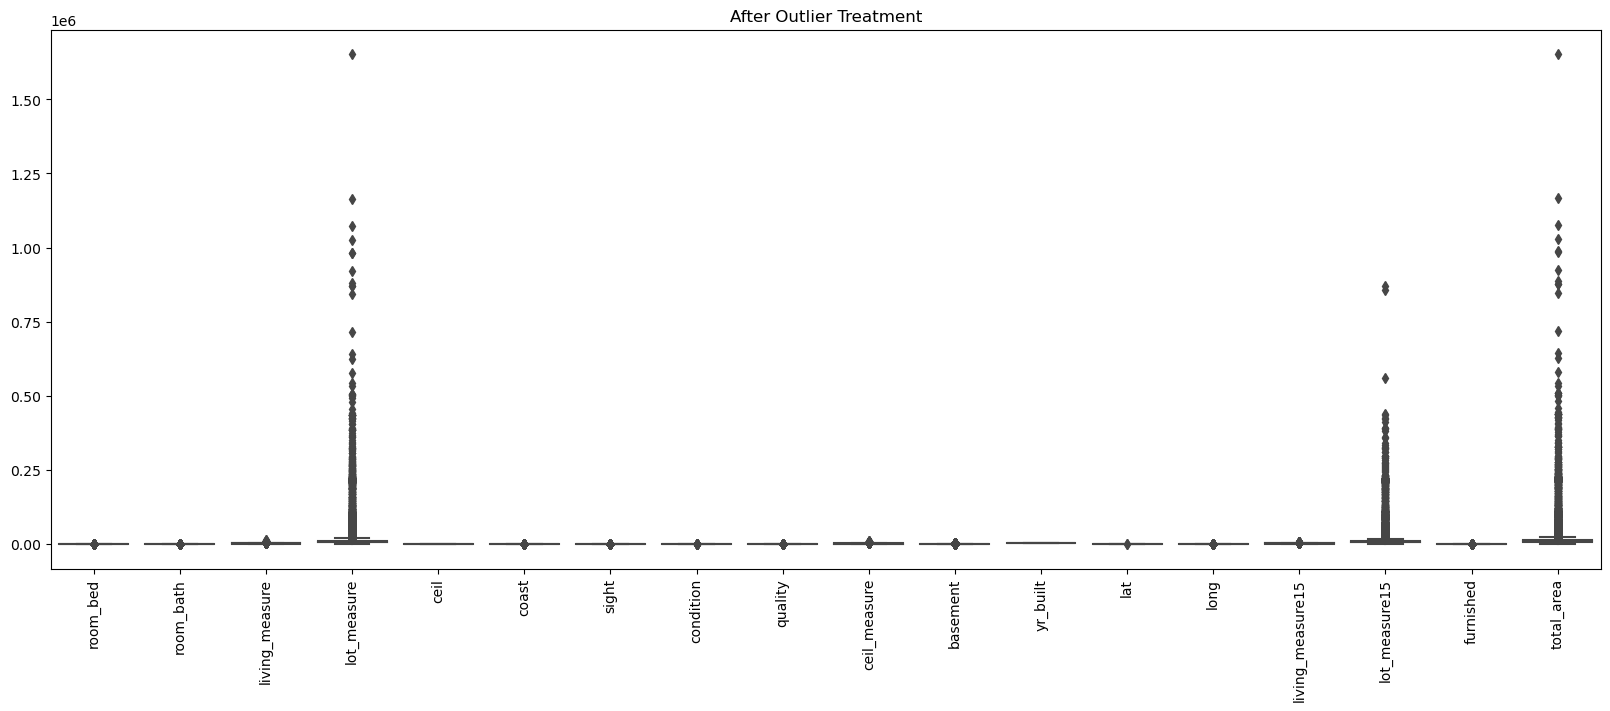

In [31]:
# Before Outlier treatment 
# construct box plot for continuous variables
# construct box plot for continuous variables
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.title('After Outlier Treatment')
sns.boxplot(data=df.drop('price',axis=1)); 

In [32]:
# we classify numeric and non-numeric Features

num_col = [f for f in X if df.dtypes[f] != 'object']
cat_col = [f for f in X if df.dtypes[f] == 'object']

## Univariate Analysis

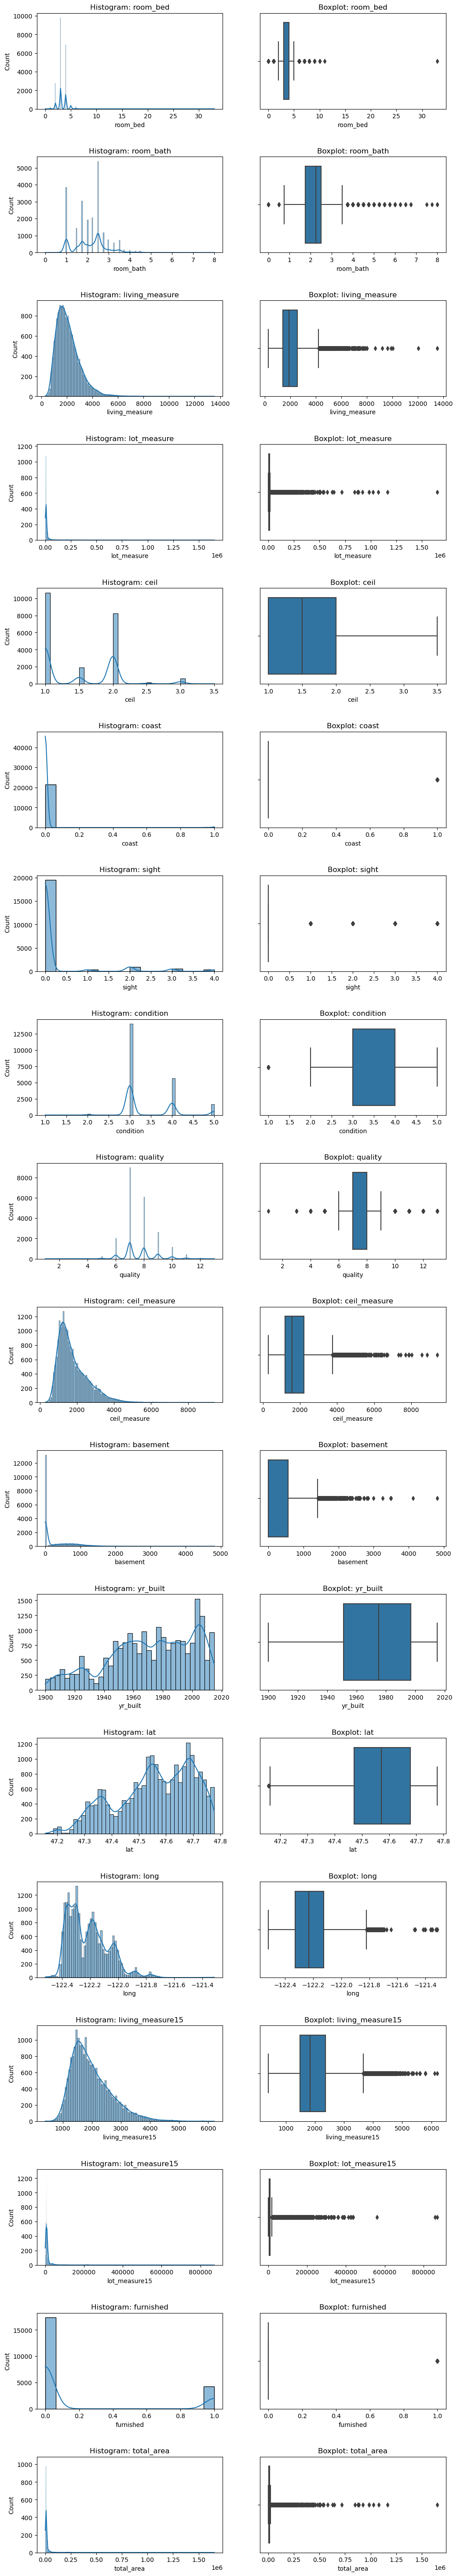

In [33]:
fig,axes = plt.subplots(18,2,figsize=(12,75))
plt.subplots_adjust(hspace=.5) #wspace
for i,j in zip(num_col,axes):
    sns.histplot(x=i,kde=True,data = df,ax=j[0])
    j[0].set_title('Histogram: '+i)
    sns.boxplot(x=i,data=df,ax=j[1],orient='h')
    j[1].set_title('Boxplot: '+i)

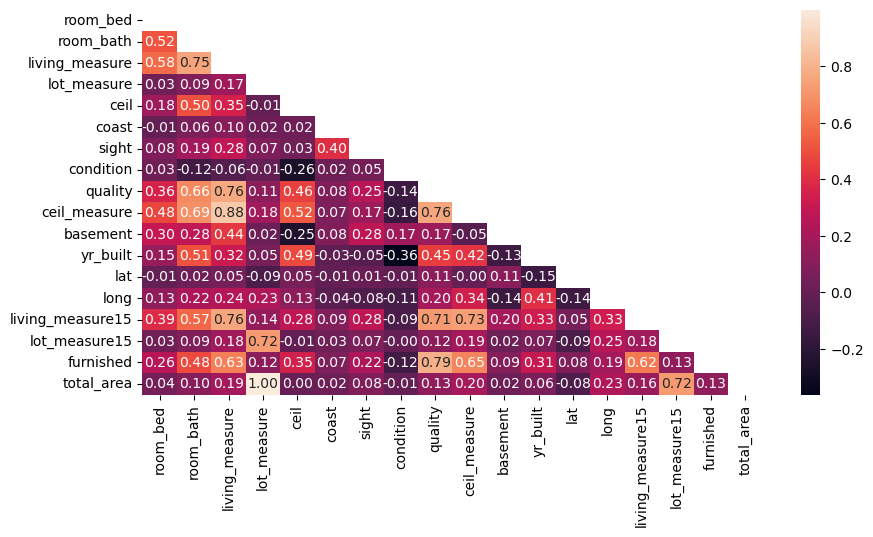

In [34]:
# Correlation
plt.figure(figsize = (10,5))
matrix=np.triu(df.loc[:, df.columns != "price"].corr())
sns.heatmap(df.loc[:, df.columns != "price"].corr(),annot=True,fmt='.2f',mask=matrix) 
plt.show()

In [35]:
df['total_area'].corr(df['lot_measure'])

0.9997634103886426

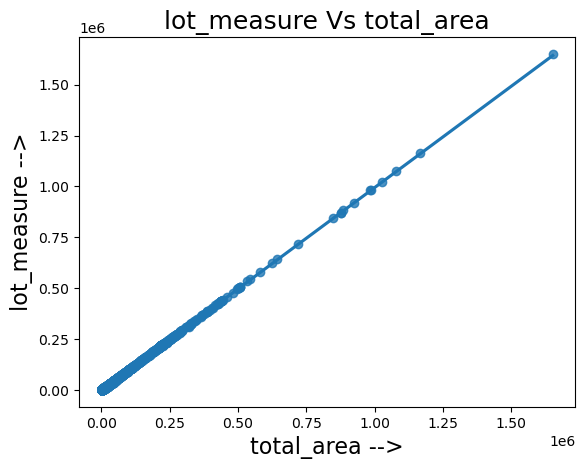

In [36]:
#> Perfect Positive correlation 
sns.regplot(x=df['total_area'],y=df['lot_measure']);
plt.title("lot_measure Vs total_area",fontsize=18);
plt.xlabel('total_area -->',fontsize = 16);
plt.ylabel('lot_measure -->',fontsize = 16);
plt.show()


In [37]:
# Droping lot_measure as it has perfect positive correlation with total_area

df.drop('lot_measure',axis=1,inplace=True)

In [38]:
# Droping lat, long also as they are geographic locators 
df.drop(['lat','long'],axis=1,inplace=True)

In [39]:
df.shape

(21613, 16)

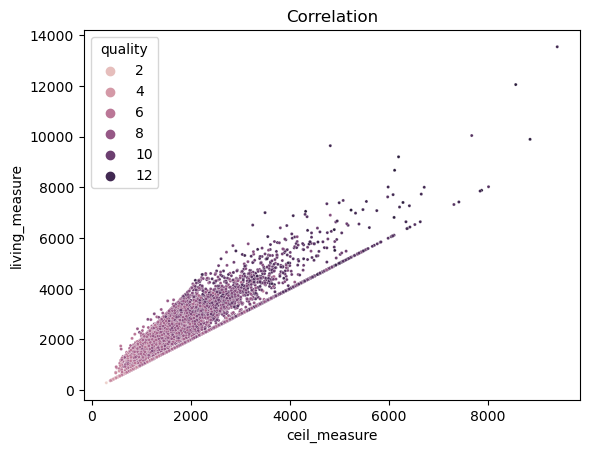

In [40]:
sns.scatterplot(x=df['ceil_measure'],y=df['living_measure'],hue=df['quality'],s=5).set(title="Correlation");

In [41]:
# Correlation values
df.corr()[df.corr()>0.6]

price  room_bed  room_bath  living_measure  ceil  coast  \
price               1.0       NaN        NaN             0.7   NaN    NaN   
room_bed            NaN       1.0        NaN             NaN   NaN    NaN   
room_bath           NaN       NaN        1.0             0.8   NaN    NaN   
living_measure      0.7       NaN        0.8             1.0   NaN    NaN   
ceil                NaN       NaN        NaN             NaN   1.0    NaN   
coast               NaN       NaN        NaN             NaN   NaN    1.0   
sight               NaN       NaN        NaN             NaN   NaN    NaN   
condition           NaN       NaN        NaN             NaN   NaN    NaN   
quality             0.7       NaN        0.7             0.8   NaN    NaN   
ceil_measure        0.6       NaN        0.7             0.9   NaN    NaN   
basement            NaN       NaN        NaN             NaN   NaN    NaN   
yr_built            NaN       NaN        NaN             NaN   NaN    NaN   
living_measure15    NaN       NaN        NaN             0.8   NaN    NaN   
lot_measure15       NaN       NaN        NaN             NaN   NaN    NaN   
furnished           NaN       NaN        NaN             0.6   NaN    NaN   
total_area          NaN       NaN        NaN             NaN   NaN    NaN   

                  sight  condition  quality  ceil_measure  basement  yr_built  \
price               NaN        NaN      0.7           0.6       NaN       NaN   
room_bed            NaN        NaN      NaN           NaN       NaN       NaN   
room_bath           NaN        NaN      0.7           0.7       NaN       NaN   
living_measure      NaN        NaN      0.8           0.9       NaN       NaN   
ceil                NaN        NaN      NaN           NaN       NaN       NaN   
coast               NaN        NaN      NaN           NaN       NaN       NaN   
sight               1.0        NaN      NaN           NaN       NaN       NaN   
condition           NaN        1.0      NaN           NaN       NaN       NaN   
quality             NaN        NaN      1.0           0.8       NaN       NaN   
ceil_measure        NaN        NaN      0.8           1.0       NaN       NaN   
basement            NaN        NaN      NaN           NaN       1.0       NaN   
yr_built            NaN        NaN      NaN           NaN       NaN       1.0   
living_measure15    NaN        NaN      0.7           0.7       NaN       NaN   
lot_measure15       NaN        NaN      NaN           NaN       NaN       NaN   
furnished           NaN        NaN      0.8           0.7       NaN       NaN   
total_area          NaN        NaN      NaN           NaN       NaN       NaN   

                  living_measure15  lot_measure15  furnished  total_area  
price                          NaN            NaN        NaN         NaN  
room_bed                       NaN            NaN        NaN         NaN  
room_bath                      NaN            NaN        NaN         NaN  
living_measure                 0.8            NaN        0.6         NaN  
ceil                           NaN            NaN        NaN         NaN  
coast                          NaN            NaN        NaN         NaN  
sight                          NaN            NaN        NaN         NaN  
condition                      NaN            NaN        NaN         NaN  
quality                        0.7            NaN        0.8         NaN  
ceil_measure                   0.7            NaN        0.7         NaN  
basement                       NaN            NaN        NaN         NaN  
yr_built                       NaN            NaN        NaN         NaN  
living_measure15               1.0            NaN        0.6         NaN  
lot_measure15                  NaN            1.0        NaN         0.7  
furnished                      0.6            NaN        1.0         NaN  
total_area                     NaN            0.7        NaN         1.0

In [42]:
# Correlation of variables with price
corr_with_price = df.corr()['price'].sort_values(ascending=False)
print(corr_with_price)

price              1.0
living_measure     0.7
quality            0.7
ceil_measure       0.6
living_measure15   0.6
furnished          0.6
room_bath          0.5
sight              0.4
basement           0.3
room_bed           0.3
coast              0.3
ceil               0.3
total_area         0.1
lot_measure15      0.1
yr_built           0.1
condition          0.0
Name: price, dtype: float64


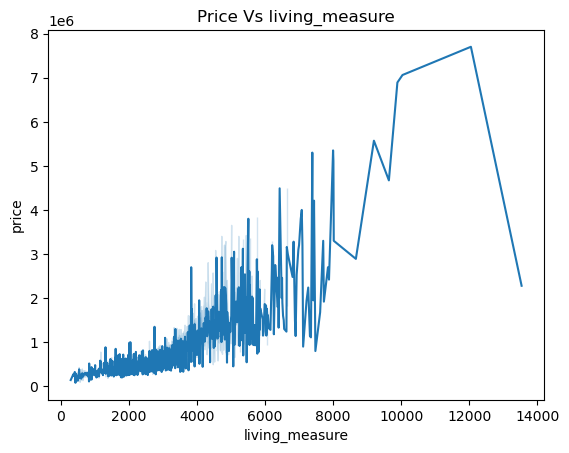

In [43]:
sns.lineplot(x='living_measure', y='price', data=df).set(title="Price Vs living_measure");

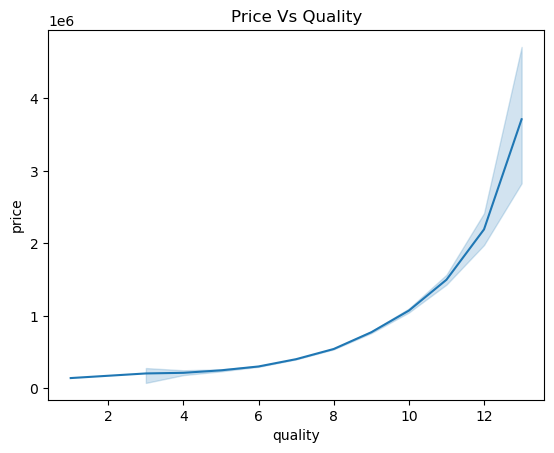

In [44]:
sns.lineplot(x='quality', y='price', data=df).set(title="Price Vs Quality");

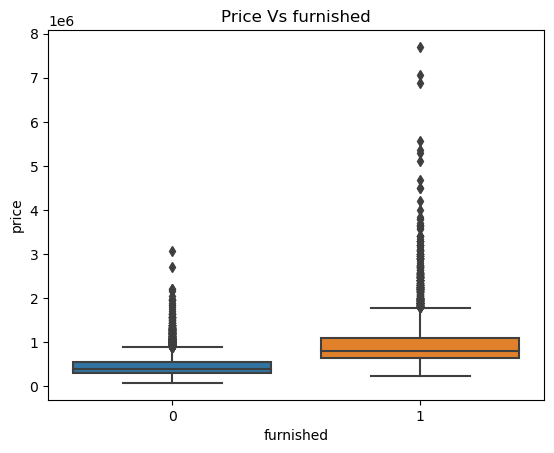

In [45]:
sns.boxplot(y='price', x='furnished', data=df).set(title="Price Vs furnished");

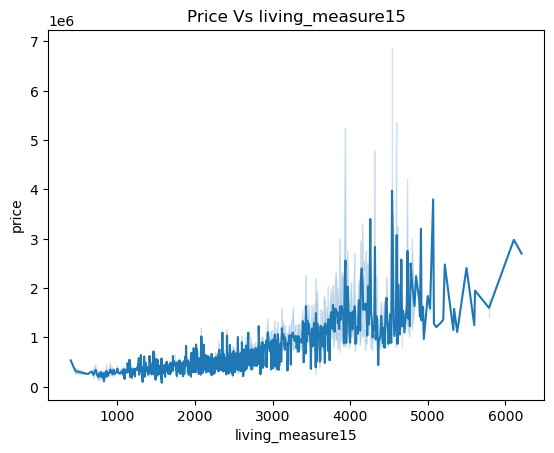

In [46]:
sns.lineplot(x='living_measure15', y='price', data=df).set(title="Price Vs living_measure15");

In [47]:
df.furnished.value_counts()

0    17362
1     4251
Name: furnished, dtype: int64

In [48]:
# Redefining numeric and non-numeric Features

num_col = [f for f in df if df.dtypes[f] != 'object']
cat_col = [f for f in df if df.dtypes[f] == 'object']

In [49]:
# Redefining X

X=df.drop('price',axis=1)

### Observations (EDA)
1) We see some strong correlation between variables. Columns with strong correlation can be removed living_measure, room_bath(0.75) ;living measure, quality (0.76) ;  
2) Many Outliers are present that can heavily skew the distribution of the data. Also, Scaling techniques s.a standardisation and normalisation are sensitive to the distribution of data.  
3) Feature Scaling (Normalisation) of data will be required to scale the data so that all features have same scale or range and also results into normal distribution which is required for many statistical tests and ML models.  

Hence, first we treat the outliers

In [50]:
#outlier treatment
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)


In [51]:
outlier_list=['room_bed','room_bath','living_measure','ceil_measure','basement','living_measure15','lot_measure15','total_area']

In [52]:
for i in df[outlier_list]:    
    df[i]=treat_outlier(df[i])

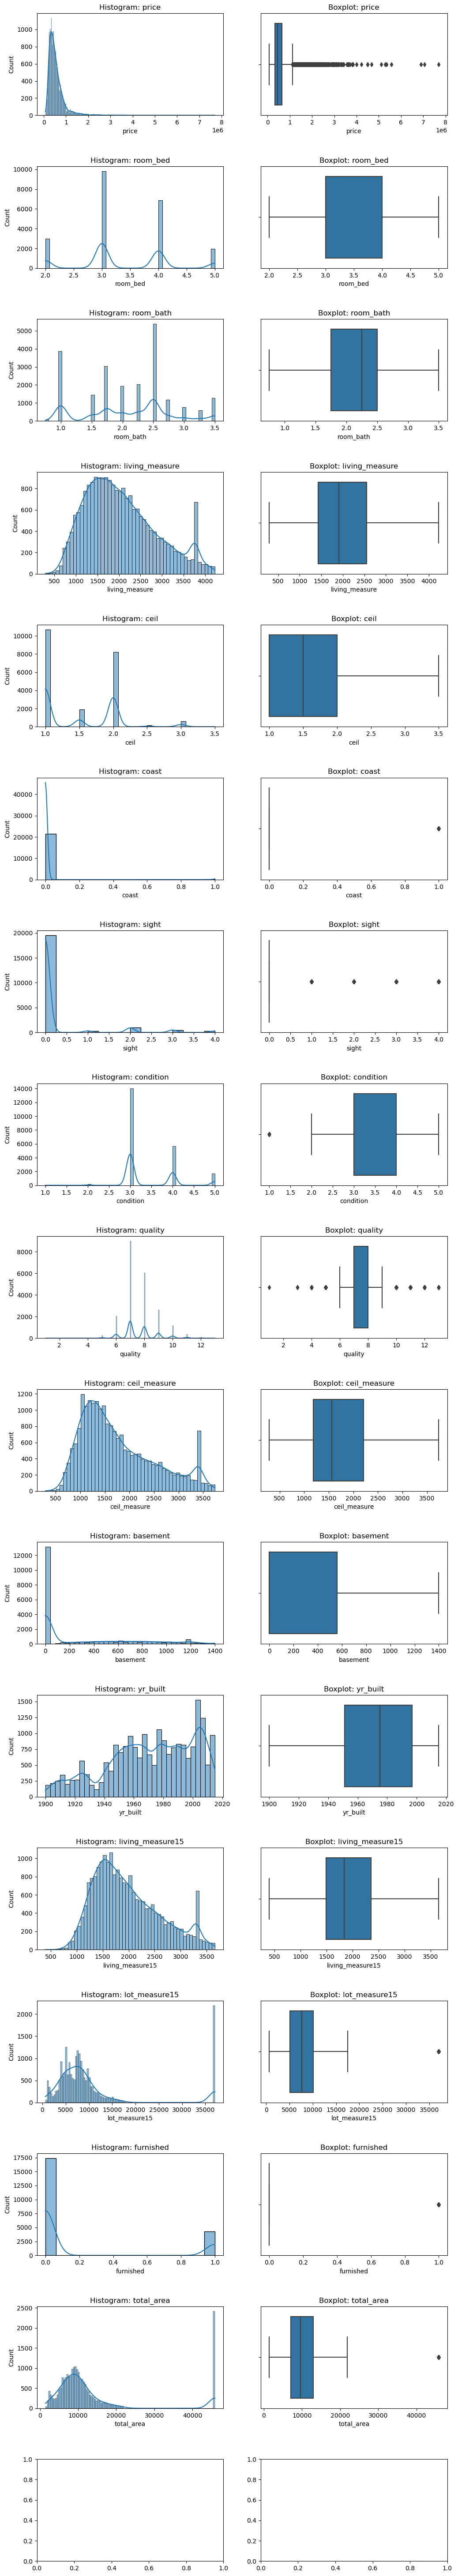

In [53]:
#> The outliers are treated

fig,axes = plt.subplots(17,2,figsize=(12,75))
plt.subplots_adjust(hspace=.5) #wspace
for i,j in zip(num_col,axes):
    sns.histplot(x=i,kde=True,data = df,ax=j[0])
    j[0].set_title('Histogram: '+i)
    sns.boxplot(x=i,data=df,ax=j[1],orient='h')
    j[1].set_title('Boxplot: '+i)

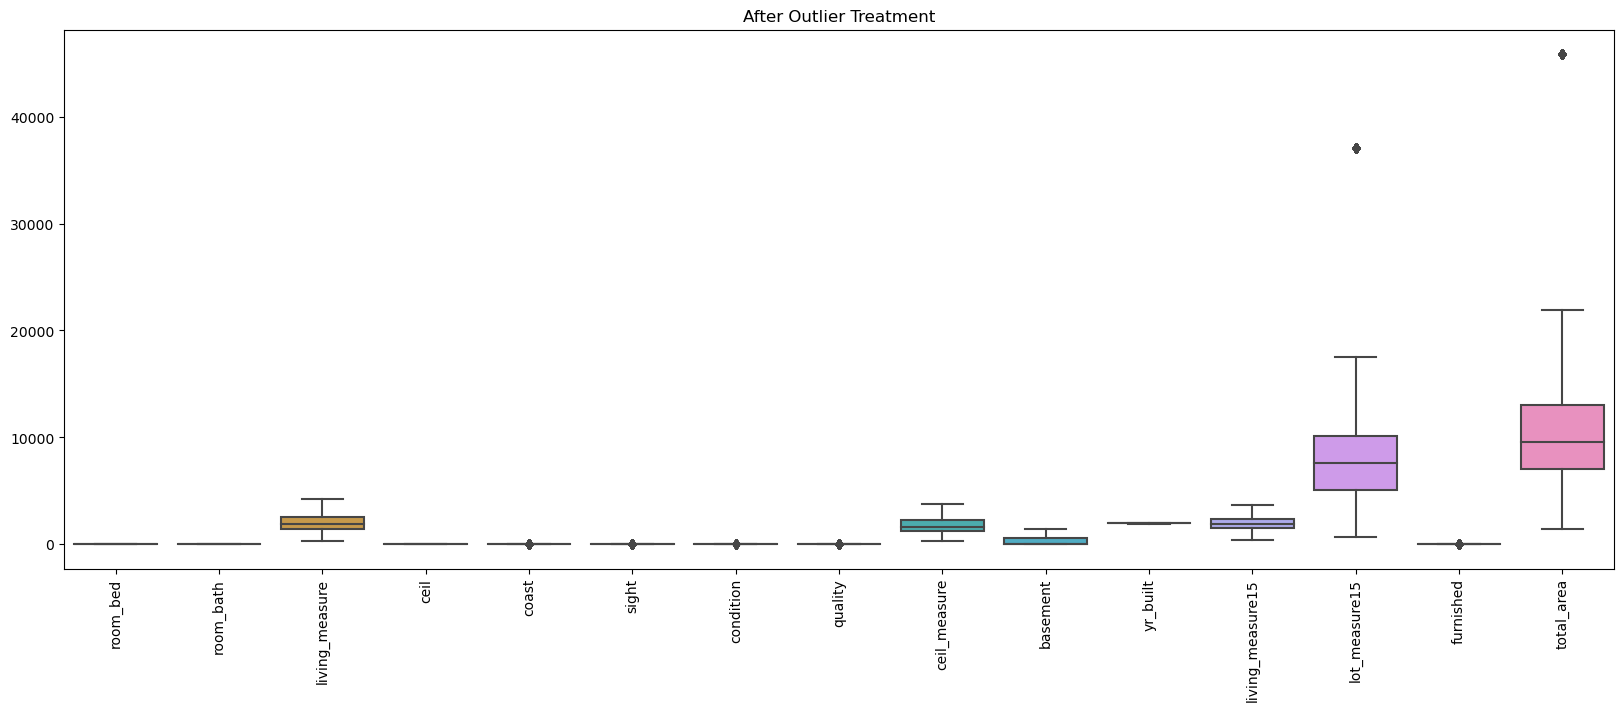

In [54]:
# After Outlier treatment 
# construct box plot for continuous variables
# construct box plot for continuous variables
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.title('After Outlier Treatment')
sns.boxplot(data=df.drop('price',axis=1)); 

Currently NOT removing any Column on the basis of high Correlation

After Outliers treatment, as the data is present in different scales we must Scale the data.
We will use standard scaler that involves scaling the data such that it has a mean of 0 and a std.dev. of 1
We will also encode the ordinal features and categorical (Year col)

Text(0, 0.5, 'No. of Records')

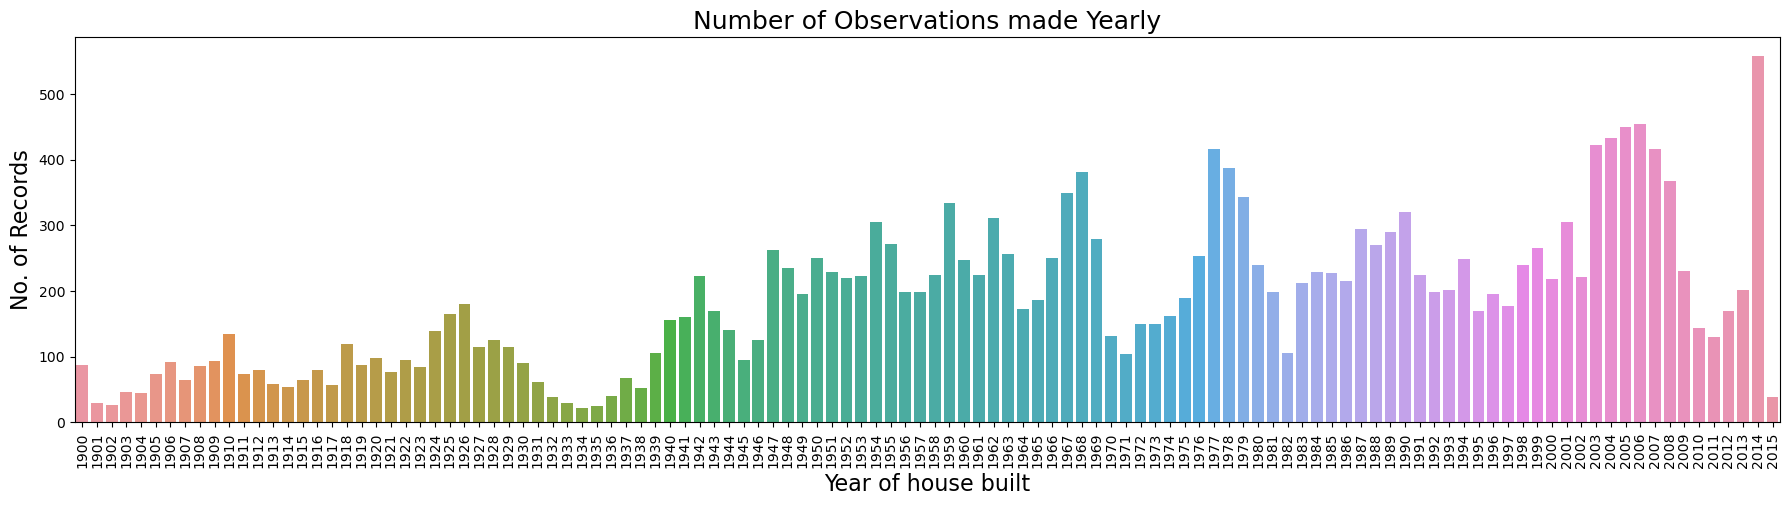

In [55]:
# Year wise house records

plt.figure(figsize=(22,5))
plt.xticks(rotation=90 )
sns.countplot(data=df, x=df['yr_built']);
plt.title('Number of Observations made Yearly',fontsize = 18)
plt.xlabel('Year of house built',fontsize = 16)
plt.ylabel('No. of Records',fontsize = 16)


In [56]:
df.head()

price  room_bed  room_bath  living_measure  ceil  coast  sight  condition  \
0  808100       4.0        3.2         3,020.0   1.0    0.0      0        5.0   
1  277500       4.0        2.5         2,550.0   1.0    0.0      0        3.0   
2  404000       3.0        2.5         2,370.0   2.0    0.0      0        3.0   
3  300000       2.0        1.0           820.0   1.0    0.0      0        4.0   
4  699000       2.0        1.5         1,400.0   1.0    0.0      0        4.0   

   quality  ceil_measure  basement  yr_built  living_measure15  lot_measure15  \
0        9       3,020.0       0.0      1956           2,120.0        7,553.0   
1        8       1,750.0     800.0      1976           2,260.0        8,800.0   
2        8       2,370.0       0.0      2006           2,370.0        4,348.0   
3        6         820.0       0.0      1916           1,520.0        3,844.0   
4        8       1,400.0       0.0      1954           1,900.0        5,940.0   

   furnished  total_area  
0          1    16,477.0  
1          0    10,050.0  
2          0     6,694.0  
3          0     4,664.0  
4          0     5,450.0

### Scaling and Normalising

In [57]:
# train test split 

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# To standardize and normalize the data in X_train and X_test, you can use the StandardScaler

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

In [59]:
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
X_train_sc=pd.DataFrame(X_train_scaled,columns=X.columns)

In [61]:
X_train_sc.head()

room_bed  room_bath  living_measure  ceil  coast  sight  condition  \
0       0.8        0.6             0.4   0.9   -0.1   -0.3       -0.6   
1       2.0        2.0             2.2   0.9   -0.1   -0.3       -0.6   
2      -0.4       -1.5            -1.2  -0.9   -0.1   -0.3       -0.6   
3      -0.4       -0.1            -0.8   0.9   -0.1   -0.3       -0.6   
4      -0.4       -0.5            -0.3  -0.9   -0.1   -0.3        0.9   

   quality  ceil_measure  basement  yr_built  living_measure15  lot_measure15  \
0      0.3           0.8      -0.7       1.2               0.7           -0.6   
1      2.0           2.2      -0.7       1.2               2.6           -0.3   
2     -0.6          -0.9      -0.7      -0.4              -0.1           -0.5   
3     -0.6          -0.5      -0.7       0.0              -0.5           -0.7   
4     -0.6          -1.1       1.4      -1.7              -1.0           -0.7   

   furnished  total_area  
0       -0.5        -0.5  
1        2.0        -0.1  
2       -0.5         2.7  
3       -0.5        -0.7  
4       -0.5        -0.6

In [62]:
X_test_sc=pd.DataFrame(X_test_scaled,columns=X.columns)

In [63]:
X_test_sc.head()

room_bed  room_bath  living_measure  ceil  coast  sight  condition  \
0      -0.4        0.9            -1.1   0.9   -0.1   -0.3       -0.6   
1       2.0        2.0             1.1   2.8   -0.1   -0.3       -0.6   
2      -0.4        0.6             0.6   1.9   -0.1    5.0       -0.6   
3      -0.4       -1.5            -0.7   0.0   -0.1   -0.3        0.9   
4      -0.4        0.6             1.0   0.9   -0.1   -0.3       -0.6   

   quality  ceil_measure  basement  yr_built  living_measure15  lot_measure15  \
0     -0.6          -1.2      -0.0       1.2              -1.1           -0.5   
1      0.3           1.6      -0.7       1.1              -0.6           -0.9   
2      1.2           1.0      -0.7      -1.9               0.7           -0.3   
3     -0.6          -0.4      -0.7      -1.8              -1.0           -0.6   
4      1.2           1.4      -0.7       1.0               1.5           -0.2   

   furnished  total_area  
0       -0.5        -0.9  
1       -0.5        -0.6  
2        2.0        -0.3  
3       -0.5        -0.7  
4        2.0        -0.2

## Modeling

### 1) Linear Regression

In [64]:
# Linear Regression fit using X_train and y_train

from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train_sc, y_train)

LinearRegression()

In [65]:
# Predict the target variable for the test data
y_pred = lr_model.predict(X_test_sc)

In [66]:
# Evaluate the model by RMSE, R square and adjusted R square

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-square
r2_lr = r2_score(y_test, y_pred)

# Calculate adjusted R-square
n = len(X_test)
p = X_test.shape[1]
adj_r2_lr = 1 - (1 - r2_lr) * (n - 1) / (n - p - 1)

print(f"RMSE: {rmse_lr}")
print(f"R-square: {r2_lr}")
print(f"Adjusted R-square: {adj_r2_lr}")

RMSE: 240057.42410702334
R-square: 0.6283996852139344
Adjusted R-square: 0.6271055118399407


In [67]:
# Evaluate the model by RMSE, R square and adjusted R square for train set


# Predict the target variable for the train data
y_train_pred = lr_model.predict(X_train_sc)

# Calculate RMSE for train set
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R-square for train set
r2_lr_train = r2_score(y_train, y_train_pred)

# Calculate adjusted R-square for train set
n_train = len(X_train)
adj_r2_lr_train = 1 - (1 - r2_lr_train) * (n_train - 1) / (n_train - p - 1)

print(f"Train set RMSE: {rmse_lr_train}")
print(f"Train set R-square: {r2_lr_train}")
print(f"Train set Adjusted R-square: {adj_r2_lr_train}")

Train set RMSE: 223699.86225369867
Train set R-square: 0.6147049637071509
Train set Adjusted R-square: 0.6143703900389563


### 2) Decision Tree

In [68]:
# Decision tree model with best parameters for X_train and y_train and predict y_pred for test set
# Create a Decision Tree Regressor object

from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [69]:
# Fit the model on the training data
dt_model.fit(X_train_sc, y_train)

DecisionTreeRegressor()

In [70]:
# Predict the target variable for the test data
y_pred_dt = dt_model.predict(X_test_sc)


In [71]:
# Evaluate the Decision tree model by RMSE, R square, and adjusted R square

# Calculate RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Calculate R-square
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate adjusted R-square
n_dt = len(X_test)
p_dt = X_test.shape[1]
adj_r2_dt = 1 - (1 - r2_dt) * (n_dt - 1) / (n_dt - p_dt - 1)

print(f"Decision Tree Model:")
print(f"RMSE: {rmse_dt}")
print(f"R-square: {r2_dt}")
print(f"Adjusted R-square: {adj_r2_dt}")

Decision Tree Model:
RMSE: 266060.91547164775
R-square: 0.5435345071113098
Adjusted R-square: 0.5419447735628236


In [72]:
# Evaluate the Decision tree model by RMSE, R square, and adjusted R square for train set
# Predict the target variable for the train data
y_train_pred_dt = dt_model.predict(X_train_sc)

# Calculate RMSE for train set
rmse_dt_train = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))

# Calculate R-square for train set
r2_dt_train = r2_score(y_train, y_train_pred_dt)

# Calculate adjusted R-square for train set
n_dt_train = len(X_train)
p_dt_train = X_train.shape[1]
adj_r2_dt_train = 1 - (1 - r2_dt_train) * (n_dt_train - 1) / (n_dt_train - p_dt_train - 1)

print(f"Train set RMSE: {rmse_dt_train}")
print(f"Train set R-square: {r2_dt_train}")
print(f"Train set Adjusted R-square: {adj_r2_dt_train}")

Train set RMSE: 13637.003962144452
Train set R-square: 0.9985681421194094
Train set Adjusted R-square: 0.9985668987554978


### 3) Random Forest

In [73]:
# Create Random Forest for X_train and y_train and predict y_pred for test set

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf_model = RandomForestRegressor()

# Fit the model on the training data
rf_model.fit(X_train_sc, y_train)

# Predict the target variable for the test data
y_pred_rf = rf_model.predict(X_test_sc)

In [74]:
# Evaluate the Random Forest model by RMSE, R square, and adjusted R square

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate R-square
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate adjusted R-square
n_rf = len(X_test)
p_rf = X_test.shape[1]
adj_r2_rf = 1 - (1 - r2_rf) * (n_rf - 1) / (n_rf - p_rf - 1)

print("Random Forest Model:")
print(f"RMSE: {rmse_rf}")
print(f"R-square: {r2_rf}")
print(f"Adjusted R-square: {adj_r2_rf}")

Random Forest Model:
RMSE: 197937.01233769924
R-square: 0.7473613387290292
Adjusted R-square: 0.7464814734123204


In [75]:
# Evaluate the Random Forest model by RMSE, R square, and adjusted R square for train set

# Predict the target variable for the train data
y_train_pred_rf = rf_model.predict(X_train_sc)

# Calculate RMSE for train set
rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))

# Calculate R-square for train set
r2_rf_train = r2_score(y_train, y_train_pred_rf)

# Calculate adjusted R-square for train set
n_rf_train = len(X_train)
p_rf_train = X_train.shape[1]
adj_r2_rf_train = 1 - (1 - r2_rf_train) * (n_rf_train - 1) / (n_rf_train - p_rf_train - 1)

print("Random Forest Model (Train Set):")
print(f"RMSE: {rmse_rf_train}")
print(f"R-square: {r2_rf_train}")
print(f"Adjusted R-square: {adj_r2_rf_train}")

Random Forest Model (Train Set):
RMSE: 70175.22160367924
R-square: 0.962083384352285
Adjusted R-square: 0.9620504591910766


In [76]:
# Performing Hyper parameter tuning for Random Forest to improve model performance

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 3, 5]
}

In [77]:
## Create a Random Forest model instance
# rf_model = RandomForestRegressor()

# Perform GridSearchCV for hyperparameter tuning
# (*Note: This step will take approx 1 hr to complete, hence commented out here. To execute please remove the # below)

#grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
#grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 7],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [78]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [79]:
# build a random forest model with parameters 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100

rf_model_best = RandomForestRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100)


In [80]:
# Fit the model on the training data
rf_model_best.fit(X_train_sc, y_train)

# Predict the target variable for the test data
y_pred_rf = rf_model_best.predict(X_test_sc)

In [81]:
# Evaluate the Random Forest model by RMSE, R square, and adjusted R square
rmse_rf_best = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf_best = r2_score(y_test, y_pred_rf)
n_rf_best = len(X_test)
p_rf_best = X_test.shape[1]
adj_r2_rf_best = 1 - (1 - r2_rf) * (n_rf - 1) / (n_rf - p_rf - 1)

print("Random Forest Model:")
print(f"RMSE: {rmse_rf_best}")
print(f"R-square: {r2_rf_best}")
print(f"Adjusted R-square: {adj_r2_rf_best}")

Random Forest Model:
RMSE: 199588.10232667933
R-square: 0.7431289933047531
Adjusted R-square: 0.7464814734123204


In [82]:
# IF non-scaled data is used (X_train, X_test)

# Train the model with the best parameters
# rf_model_best = RandomForestRegressor(**best_params)
rf_model_best = RandomForestRegressor(**best_params)
rf_model_best.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=200)

In [83]:
print(best_params)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [84]:
# Use the trained model for prediction
y_pred = rf_model_best.predict(X_test)

In [85]:
# Calculate evaluation metrics
rmse_rf_best = mean_squared_error(y_test, y_pred, squared=False)
r2_rf_best = r2_score(y_test, y_pred)

n_rf_best = len(X_test)
p_rf_best = X_test.shape[1]
adj_r2_rf_best = 1 - (1 - r2_rf_best) * (n_rf_best - 1) / (n_rf_best - p_rf_best - 1)

print("Random Forest Model (Tuned):")
print(f"RMSE: {rmse_rf_best}")
print(f"R-square: {r2_rf_best}")
print(f"Adjusted R-square: {adj_r2_rf_best}")

Random Forest Model (Tuned):
RMSE: 197877.70858784084
R-square: 0.7475127017849854
Adjusted R-square: 0.7466333636207818


### 4) KNN Model

In [86]:
# Create KNN for X_train and y_train and predict y_pred for test set

from sklearn.neighbors import KNeighborsRegressor

# Create a KNN Regressor object
knn_model = KNeighborsRegressor()

# Fit the model on the training data
knn_model.fit(X_train_sc, y_train)

# Predict the target variable for the test data
y_pred_knn = knn_model.predict(X_test_sc)

In [87]:
# Evaluate the KNN model by RMSE, R square, and adjusted R square

# Calculate RMSE
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# Calculate R-square
r2_knn = r2_score(y_test, y_pred_knn)

# Calculate adjusted R-square
n_knn = len(X_test)
p_knn = X_test.shape[1]
adj_r2_knn = 1 - (1 - r2_knn) * (n_knn - 1) / (n_knn - p_knn - 1)

print("KNN Model:")
print(f"RMSE: {rmse_knn}")
print(f"R-square: {r2_knn}")
print(f"Adjusted R-square: {adj_r2_knn}")

KNN Model:
RMSE: 220174.52015688602
R-square: 0.6874065260734135
Adjusted R-square: 0.6863178559761535


In [88]:
# Evaluate the KNN model by RMSE, R square, and adjusted R square fro train set

rmse_knn_train = np.sqrt(mean_squared_error(y_train, knn_model.predict(X_train_sc)))
r2_knn_train = r2_score(y_train, knn_model.predict(X_train_sc))
n_knn_train = len(X_train)
p_knn_train = X_train.shape[1]
adj_r2_knn_train = 1 - (1 - r2_knn_train) * (n_knn_train - 1) / (n_knn_train - p_knn_train - 1)

print("KNN Model (Train Set):")
print(f"RMSE: {rmse_knn_train}")
print(f"R-square: {r2_knn_train}")
print(f"Adjusted R-square: {adj_r2_knn_train}")

KNN Model (Train Set):
RMSE: 166498.52735632184
R-square: 0.7865565785295944
Adjusted R-square: 0.7863712334258515


### 5) BAGGING

In [89]:
# Create Bagging model (base model will be Decision tree) for X_train and y_train and predict y_pred for test set
from sklearn.ensemble import BaggingRegressor

# Create a Bagging Regressor object
bagging_model = BaggingRegressor()

# Fit the model on the training data
bagging_model.fit(X_train_sc, y_train)

# Predict the target variable for the test data
y_pred_bagging = bagging_model.predict(X_test_sc)

In [90]:
# Evaluate the Bagging model by RMSE, R-square, and adjusted R-square

# Calculate RMSE
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))

# Calculate R-square
r2_bagging = r2_score(y_test, y_pred_bagging)

# Calculate adjusted R-square
n_bagging = len(X_test)
p_bagging = X_test.shape[1]
adj_r2_bagging = 1 - (1 - r2_bagging) * (n_bagging - 1) / (n_bagging - p_bagging - 1)

print("Bagging Model:")
print(f"RMSE: {rmse_bagging}")
print(f"R-square: {r2_bagging}")
print(f"Adjusted R-square: {adj_r2_bagging}")

Bagging Model:
RMSE: 205849.76751654965
R-square: 0.7267585687156655
Adjusted R-square: 0.7258069500787336


In [91]:
# Evaluate the Bagging model by RMSE, R-square, and adjusted R-square for train set

# Calculate RMSE
rmse_bagging_train = np.sqrt(mean_squared_error(y_train, bagging_model.predict(X_train_sc)))

# Calculate R-square
r2_bagging_train = r2_score(y_train, bagging_model.predict(X_train_sc))

# Calculate adjusted R-square
n_bagging_train = len(X_train)
p_bagging_train = X_train.shape[1]
adj_r2_bagging_train = 1 - (1 - r2_bagging_train) * (n_bagging_train - 1) / (n_bagging_train - p_bagging_train - 1)

print("Bagging Model (Train Set):")
print(f"RMSE: {rmse_bagging_train}")
print(f"R-square: {r2_bagging_train}")
print(f"Adjusted R-square: {adj_r2_bagging_train}")

Bagging Model (Train Set):
RMSE: 84235.47786150301
R-square: 0.9453673749366514
Adjusted R-square: 0.9453199343105109


### 6) XG BOOST

In [92]:
# Create XG-boost model for X_train and y_train and predict y_pred for test set

from xgboost import XGBRegressor

#Create an XGBoost Regressor object
xgb_model = XGBRegressor()

#Fit the model on the training data
xgb_model.fit(X_train_sc, y_train)

#Predict the target variable for the test data
y_pred_xgb = xgb_model.predict(X_test_sc)

In [93]:
# Evaluate the XGBoost model by RMSE, R-square, and adjusted R-square

# Calculate RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate R-square
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate adjusted R-square
n_xgb = len(X_test)
p_xgb = X_test.shape[1]
adj_r2_xgb = 1 - (1 - r2_xgb) * (n_xgb - 1) / (n_xgb - p_xgb - 1)

print("XGBoost Model:")
print(f"RMSE: {rmse_xgb}")
print(f"R-square: {r2_xgb}")
print(f"Adjusted R-square: {adj_r2_xgb}")

XGBoost Model:
RMSE: 210528.31078862541
R-square: 0.7141969878929738
Adjusted R-square: 0.7132016210061372


In [94]:
# Evaluate the XGBoost model by RMSE, R-square, and adjusted R-square for train set

# Calculate RMSE
rmse_xgb_train = np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train_sc)))

# Calculate R-square
r2_xgb_train = r2_score(y_train, xgb_model.predict(X_train_sc))

# Calculate adjusted R-square
n_xgb_train = len(X_train)
p_xgb_train = X_train.shape[1]
adj_r2_xgb_train = 1 - (1 - r2_xgb_train) * (n_xgb_train - 1) / (n_xgb_train - p_xgb_train - 1)

print("XGBoost Model (Train Set):")
print(f"RMSE: {rmse_xgb_train}")
print(f"R-square: {r2_xgb_train}")
print(f"Adjusted R-square: {adj_r2_xgb_train}")

XGBoost Model (Train Set):
RMSE: 111393.29914109404
R-square: 0.9044611269726942
Adjusted R-square: 0.9043781651169914


### 7) OLS STATSMODEL

In [95]:
# using statsmodel Create statsmodel OLS regression model for X_train and y_train and predict y_pred for test set 

import statsmodels.api as sm

# Create a statsmodel OLS (Ordinary Least Squares) regression model
ols_model = sm.OLS(y_train, X_train)

# Fit the model on the training data
results = ols_model.fit()

# Predict the target variable for the test data
y_pred_statsmodel = results.predict(X_test)

In [96]:
# Evaluate the statsmodel OLS model by RMSE, R-square, and adjusted R-square

# Calculate RMSE
rmse_statsmodel = np.sqrt(mean_squared_error(y_test, y_pred_statsmodel))

# Calculate R-square
r2_statsmodel = r2_score(y_test, y_pred_statsmodel)

# Calculate adjusted R-square
n_statsmodel = len(X_test)
p_statsmodel = X_test.shape[1]
adj_r2_statsmodel = 1 - (1 - r2_statsmodel) * (n_statsmodel - 1) / (n_statsmodel - p_statsmodel - 1)

print("Statsmodel OLS Model:")
print(f"RMSE: {rmse_statsmodel}")
print(f"R-square: {r2_statsmodel}")
print(f"Adjusted R-square: {adj_r2_statsmodel}")

Statsmodel OLS Model:
RMSE: 250611.74470432324
R-square: 0.5950059620919643
Adjusted R-square: 0.5935954883123914


In [97]:
# Evaluate the statsmodel OLS model by RMSE, R-square, and adjusted R-square for train set

# Calculate RMSE
rmse_train_statsmodel = np.sqrt(mean_squared_error(y_train, results.predict(X_train)))

# Calculate R-square
r2_train_statsmodel = r2_score(y_train, results.predict(X_train))

# Calculate adjusted R-square
n_train_statsmodel = len(X_train)
p_train_statsmodel = X_train.shape[1]
adj_r2_train_statsmodel = 1 - (1 - r2_train_statsmodel) * (n_train_statsmodel - 1) / (n_train_statsmodel - p_train_statsmodel - 1)

print("Statsmodel OLS Model (Train Set):")
print(f"RMSE: {rmse_train_statsmodel}")
print(f"R-square: {r2_train_statsmodel}")
print(f"Adjusted R-square: {adj_r2_train_statsmodel}")

Statsmodel OLS Model (Train Set):
RMSE: 233399.701982016
R-square: 0.5805670209030235
Adjusted R-square: 0.5802028033108935


In [98]:
# Getting summary of ols_model

summary_statsmodel = results.summary()
print(summary_statsmodel)


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              7701.
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                        0.00
Time:                        15:31:40   Log-Likelihood:                     -2.3825e+05
No. Observations:               17290   AIC:                                  4.765e+05
Df Residuals:                   17275   BIC:                                  4.766e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### Summary of Performance Metrics
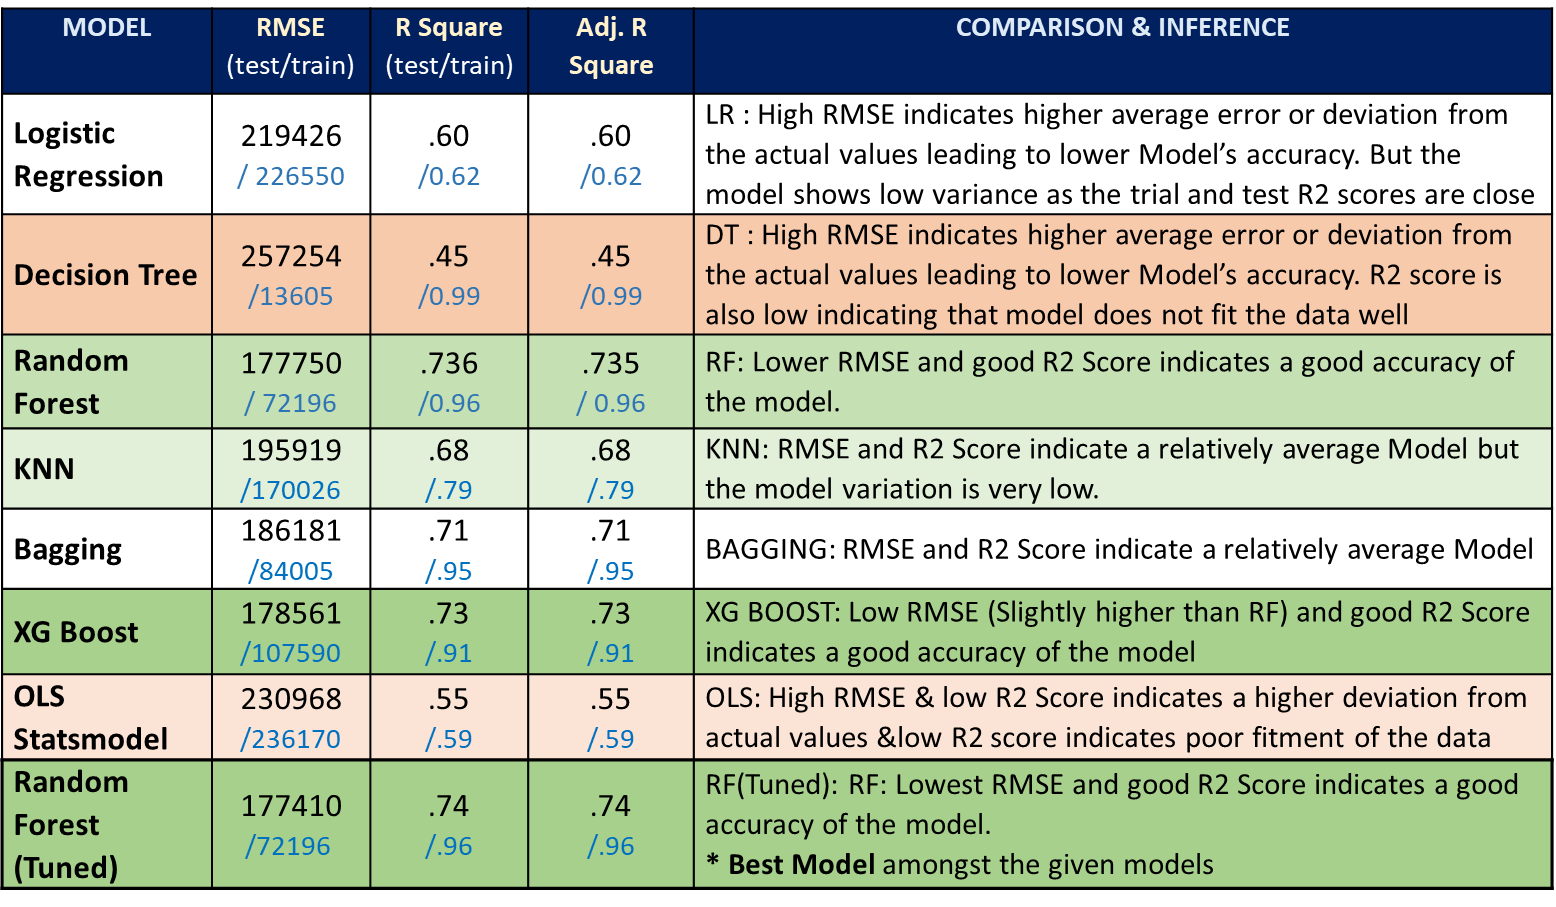

In [99]:
# deriving business recommendations insights from the xgb_model

# Get the feature importances from the XGBoost model
feature_importances = xgb_model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top 5 features
top_features_xgb = X.columns[sorted_indices]

# Print the business recommendation insights
print("Business Recommendation Insights:")
print("Top important features (from XG Boost model):")
for feature in top_features_xgb:
    print(f"- {feature}")

Business Recommendation Insights:
Top important features (from XG Boost model):
- quality
- coast
- living_measure
- sight
- yr_built
- living_measure15
- basement
- condition
- lot_measure15
- ceil
- total_area
- room_bath
- ceil_measure
- room_bed
- furnished


In [100]:
# derive business recommendations insights from the rf_model_best

# Get the feature importances from the XGBoost model
feature_importances = rf_model_best.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top 5 features
top_features_rf = X.columns[sorted_indices]

# Print the business recommendation insights
print("Business Recommendation Insights:")
print("Top important features (from Random Forest(Tuned)model):")
for feature in top_features_rf:
    print(f"- {feature}") 

Business Recommendation Insights:
Top important features (from Random Forest(Tuned)model):
- quality
- living_measure
- yr_built
- furnished
- living_measure15
- lot_measure15
- coast
- total_area
- ceil_measure
- sight
- basement
- room_bath
- room_bed
- condition
- ceil


### INTERPRETATION OF MOST OPTIMUM (Random Forest -Tuned) & BUSINESS IMPLECATION
- quality
- living_measure
- yr_built
- furnished
- living_measure15
- coast
***
* As per the feature importance, the primary determinant for predicting the price of a housing unit is its quality rating. This suggests that buyers prioritize the current quality of the house as the most significant factor when assessing its value.

* The square footage of a home, also known as the living measure, is a crucial factor that significantly impacts the property's valuation. A larger area of the home unit leads to a higher value being assigned to the property. 

* Determining the price of a house is heavily influenced by its year of construction, indicating the vital role this factor plays. A more recent construction is associated with higher expected quality, leading to a correspondingly higher anticipated property valuation. Therefore, the 'yr_built' feature is one of the top 5 features as per feature importance.

* The Furnished status of the house also impacts the house price. A well-furnished house significantly improves the overall valuation of the property.

* The feature living_measure15 implying the Living room area in 2015(implies-- some renovations) also has significant effect on the house price. 

* Along with the above top 5 features, we also see that the houses in the coastal area with a view to a waterfront are relatively higher in price. This is evident from the ‘coast’ feature

    Interestingly, the number of bedrooms, bathrooms, and even the number of floors in a house have minimal impact on house prices. This observation indicates that the overall area of the house holds greater importance than the internal layout when determining its value.

    With a Prediction model of good accuracy and fitment, we can expect price prediction with less deviation from the actual price. This may help various stakeholders to have a good approximation of the expected price of the house considering different features. 

    The feature importance from the Model can help buyers and sellers to focus on key features that impacts the property prices significantly. On the other hand, also helping stakeholders to identify the features that may not enhance or degrade the house price. 

This will help to make better decisions in any business deal. It can also enhance the experience of customers looking to buy houses in specific price range and selected features.  
                              
---------------------------------------------------------------------------